Project 1: Credit Scoring Model (Repaying the Payment)

 Develop a credit scoring model to predict the
 creditworthiness of individuals based on historical
 financial data. Utilize classification algorithms and
 assess the model's accuracy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

Data preprocessing and Data uploaded

In [2]:
df = pd.read_csv('credit_score.csv')
df

C:\Users\AL-HAMD\AppData\Local\Temp\ipykernel_5756\1717008585.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('credit_score.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [7]:
df.shape

(100000, 28)

In [8]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

We can skip some features that aren't important for the given data

In [9]:
df = df.drop(columns = ['ID', 'Customer_ID', 'SSN', 'Name', 'Month'])
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [10]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

fill  the missing  values

In [11]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].mean()
df.fillna(df['Monthly_Inhand_Salary'], inplace= True)


df['Type_of_Loan'] = df['Type_of_Loan'].mode()[0]
df.fillna(df['Type_of_Loan'], inplace= True)


df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].mode()[0]
df.fillna(df['Num_of_Delayed_Payment'], inplace= True)


df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].mean()
df.fillna(df['Num_Credit_Inquiries'], inplace= True)


df['Credit_History_Age'] = df['Credit_History_Age'].mode()[0]
df.fillna(df['Credit_History_Age'], inplace= True)


df['Amount_invested_monthly'] = df['Amount_invested_monthly'].mode()[0]
df.fillna(df['Amount_invested_monthly'], inplace= True)


df['Monthly_Balance'] = df['Monthly_Balance'].mode()[0]
df.fillna(df['Monthly_Balance'], inplace= True)


In [12]:
df.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [13]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [14]:
df['Num_of_Delayed_Payment'].unique()

array(['19'], dtype=object)

In [15]:
df['Changed_Credit_Limit'].unique()

array(['11.27', '_', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [16]:
df['Num_Credit_Inquiries'].unique()

array([27.75425103])

In [17]:
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [18]:
df['Monthly_Inhand_Salary'].unique()

array([4194.1708496])

In [19]:
df['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [20]:
df['Type_of_Loan'].unique()

array(['Not Specified'], dtype=object)

In [21]:
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [22]:
df['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [23]:
df['Credit_Utilization_Ratio'].unique()

array([26.82261962, 31.94496006, 28.60935202, ..., 41.25552226,
       33.63820798, 34.19246265])

In [24]:
df['Credit_History_Age'].unique()

array(['15 Years and 11 Months'], dtype=object)

In [25]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [26]:
df['Total_EMI_per_month'].unique()

array([4.95749492e+01, 1.88162146e+01, 2.46992319e+02, ...,
       1.21120000e+04, 3.51040226e+01, 5.86380000e+04])

In [27]:
df['Amount_invested_monthly'].unique()

array(['__10000__'], dtype=object)

In [28]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [29]:
df['Monthly_Balance'].unique()

array(['__-333333333333333333333333333__'], dtype=object)

In [30]:
df['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [31]:
df['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

 Replace the missing or a blank row we can filled by unknown '_______' for the all columns

In [32]:
if '_______' in df['Occupation'].values:
    df['Occupation'].replace('_______', 'unknown' , inplace=True)


if '_' in df['Credit_Mix'].values:
    df['Credit_Mix'].replace('_' , 'unknown', inplace = True)


if '_' in df['Credit_Mix'].values:
    df['Credit_Mix'].replace('_', 'unknown_credit', inplace = True)


if '_' in df['Changed_Credit_Limit'].values:
    df['Changed_Credit_Limit'].replace('_', 15.897, inplace = True)


if  '!@9#%8' in df['Payment_Behaviour'].values:
    df['Payment_Behaviour'].replace('!@9#%8', 'unknown_payment', inplace = True)

C:\Users\AL-HAMD\AppData\Local\Temp\ipykernel_5756\976582710.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Occupation'].replace('_______', 'unknown' , inplace=True)
C:\Users\AL-HAMD\AppData\Local\Temp\ipykernel_5756\976582710.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

handle the Mix values numeric and underscore like this 456_ so we can these type of data can handle

In [33]:

df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_', '', regex=True)
if 'NaN' in df['Monthly_Balance'].values:
    df['Monthly_Balance'].replace('NaN', df['Monthly_Balance'].mean(), inplace = True)



df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '', regex=True)
if 'NaN' in df['Outstanding_Debt'].values:
    df['Outstanding_Debt'].replace('NaN', df['Outstanding_Debt'].mean(), inplace = True)


df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '', regex=True)
if 'NaN' in df['Amount_invested_monthly'].values:
    df['Amount_invested_monthly'].replace('NaN', df['Amount_invested_monthly'].mean(), inplace = True)



df['Age'] = df['Age'].str.replace('_', '', regex=True)
if 'NaN' in df['Age'].values:
    df['Age'].replace('NaN', df['Age'].mean(), inplace = True)



df['Annual_Income'] = df['Annual_Income'].str.replace('_', '', regex=True)
if 'NaN' in df['Annual_Income'].values:
    df['Annual_Income'].replace('NaN', df['Annual_Income'].mean(), inplace = True)



df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '', regex=True)
if 'NaN' in df['Num_of_Loan'].values:
    df['Num_of_Loan'].replace('NaN', df['Num_of_Loan'].mean(), inplace = True)


Split the year and month from credit histpry age column

In [34]:
df['Credit_History_year'] = df['Credit_History_Age'].str.extract('(\d+)')
df['Credit_History_year']


df['Credit_History_month'] = df['Credit_History_Age'].apply(lambda s : s.split()[3])
df['Credit_History_month']


df = df.drop(columns = 'Credit_History_Age')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\AL-HAMD\AppData\Local\Temp\ipykernel_5756\1297198879.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Credit_History_year'] = df['Credit_History_Age'].str.extract('(\d+)')


Initialize the feature columns and target col

In [35]:
X = df.drop(columns = 'Credit_Score')
Y = df['Credit_Score']

We can split the data into the train test split

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.2, random_state= 2)

Transform the data into categorical to a numerical data

In [37]:
ct = ColumnTransformer(transformers= [
    ('oe1' , OrdinalEncoder(categories= [['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
    'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
    'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
    'Architect', 'unknown']]), ['Occupation']),

    ('oe2', OrdinalEncoder(categories = [['Not Specified']]), ['Type_of_Loan']),

    ('oe3', OrdinalEncoder(categories= [['unknown', 'Bad', 'Standard', 'Good']]), ['Credit_Mix']),

    ('oe4', OrdinalEncoder(categories= [['No', 'NM', 'Yes']]), ['Payment_of_Min_Amount']),

    ('oe5', OrdinalEncoder(categories= [['unknown_payment', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments', 
                                        'High_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Large_value_payments']]), ['Payment_Behaviour'])
],
    remainder = 'passthrough'
)

we can fit and transform the column transformer for both train and test data

In [38]:
ct_train = ct.fit_transform(xtrain)

ct_test = ct.transform(xtest)

In [39]:
print(ct_train.shape)
print(ct_test.shape)

(80000, 23)
(20000, 23)


we can handle the 0 and negative values by yeo johnson method using power transformer for both train and test dataa

In [40]:
pt = PowerTransformer(method = 'yeo-johnson')

xtrain_pt = pt.fit_transform(ct_train)

xtest_pt = pt.transform(ct_test)

Model Train by the transform data

In [41]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(xtrain_pt, ytrain)
y_pred = knn.predict(xtest_pt)
y_pred

array(['Standard', 'Poor', 'Standard', ..., 'Poor', 'Poor', 'Standard'],
      dtype=object)

Random input value pass then predict the model can correctly train or not 

In [42]:
input_value = [[10.0,	0.0	,3.0, 0.0,	6.0,	54,	77963.9,	4194.17085,	4,	4,	24,  11.25,  22.27, 	19,	2.34,	27.754251,	1441.62	, 40.283944,	136.825947,	10000,	-333333333333333333333333333, 15	,11]]
y_pred_input = knn.predict(input_value)
y_pred_input

array(['Standard'], dtype=object)

Evaluate the model's performance by using accuracy score and classification report

In [43]:
acc_score = accuracy_score(ytest, y_pred)
print('The accuracy score of the knn model is', acc_score)

The accuracy score of the knn model is 0.66935


In [44]:
performance_report = classification_report(ytest, y_pred)
print('The classification report of theknn model is \n', performance_report)

The classification report of theknn model is 
               precision    recall  f1-score   support

        Good       0.55      0.59      0.57      3556
        Poor       0.66      0.64      0.65      5824
    Standard       0.72      0.72      0.72     10620

    accuracy                           0.67     20000
   macro avg       0.64      0.65      0.64     20000
weighted avg       0.67      0.67      0.67     20000



also evaluate the performance using cross val score

In [45]:
X_ct = ct.fit_transform(X)
X_ct_pt = pt.fit_transform(X_ct)

cross_val = cross_val_score(knn,  X_ct_pt,  Y, cv= 5)
cross_val_mean = cross_val.sum()/len(cross_val)
print('The cross validation score of the knn model is', cross_val_mean)

The cross validation score of the knn model is 0.6341300000000001


Create a confusion matrix to check the True False prediction

In [46]:
conf_matrix = confusion_matrix(ytest, y_pred)
conf_matrix

array([[2084,  209, 1263],
       [ 382, 3709, 1733],
       [1290, 1736, 7594]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted Data')

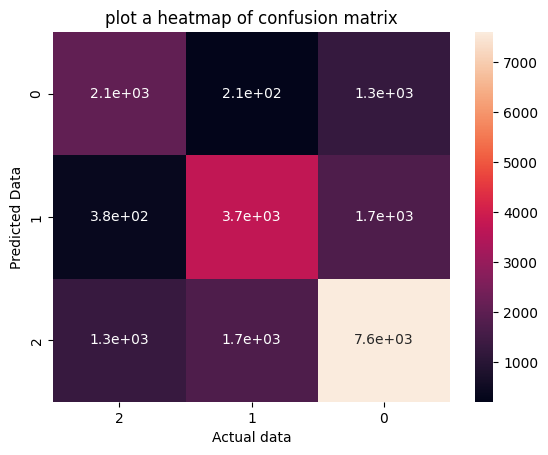

In [47]:
sns.heatmap(conf_matrix, annot= True, xticklabels= [2,1,0])
plt.title("plot a heatmap of confusion matrix")
plt.xlabel('Actual data')
plt.ylabel('Predicted Data')

plotting

<Axes: ylabel='Credit_Score'>

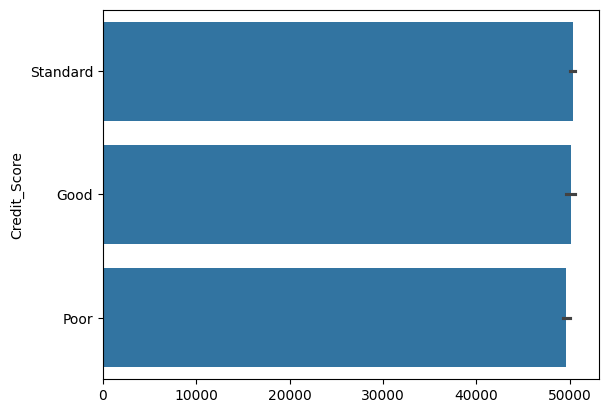

In [48]:
sns.barplot(ytrain)

<Axes: >

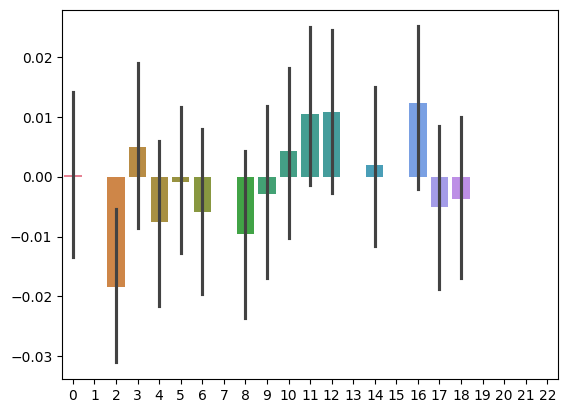

In [49]:
sns.barplot(xtest_pt)